In [ ]:
def mclp(coordinate_POI, coordinate_AED, K, radius):
    """
    Solve maximum covering location problem
    Input:
        points: input points, Numpy array in shape of [N,2]
        K: the number of sites to select
        radius: the radius of circle
        M: the number of candidate sites, which will randomly generated inside
        the ConvexHull wrapped by the polygon
    Return:
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        f: the optimal value of the objective function
    """
    print('----- Configurations -----')
    print('  Number of coordinate_POI %g' % coordinate_POI.shape[0])
    print('  K %g' % K)
    print('  Radius %g' % radius)
    import time
    start = time.time()
    J = coordinate_AED.shape[0]
    I = coordinate_POI.shape[0]
    D = distance_matrix(coordinate_POI,coordinate_AED)
    #decision variables
    mask1 = D<=radius
    D[mask1]=1
    D[~mask1]=0
    # Build model
    m = Model()
    # Add variables
    y = m.addVars(I, vtype=GRB.BINARY, name="y")
    x = m.addVars(J, vtype=GRB.BINARY, name="x")    
    m.update()
    # Add constraints 
    m.addConstr(quicksum(x[j] for j in range(J)) == K)
    
    for i in range(I):
        m.addConstr(quicksum(x[j] for j in np.where(D[i]==1)[0]) >= y[i])
 
    m.setObjective(quicksum(y[i]for i in range(I)),GRB.MAXIMIZE)
    m.setParam('OutputFlag', 0)
    m.optimize()
    end = time.time()
    print('----- Output -----')
    print('  Running time : {} seconds'.format(float(end-start)))
    print('  Optimal coverage POI: {}'.format(m.objVal))
    print('  Coverage Rate POI: {}'.format(m.objVal/coordinate_POI.shape[0]))
    rate = m.objVal/coordinate_POI.shape[0]
    solution = []
#     break
    if m.status == GRB.Status.OPTIMAL:
        for v in m.getVars():
            # print v.varName,v.x
    #         print(v.varName[0])
    #         print(v)
            if v.x==1 and v.varName[0]=="x":
    #             print(v.varName.split("[")[1].split("]")[0])
                solution.append(int(v.varName.split("[")[1].split("]")[0]))
    opt_sites = coordinate_AED[solution]
    return opt_sites,m.objVal, m, rate

In [4]:
import geopandas as gpd

In [9]:
AEDAfterOptimization=gpd.read_file(r"..\byHour_Optimization\Result_byHour\visitorSample_61575\AEDAfterOptimization\AEDAfterOptimization.shp")

<AxesSubplot:>

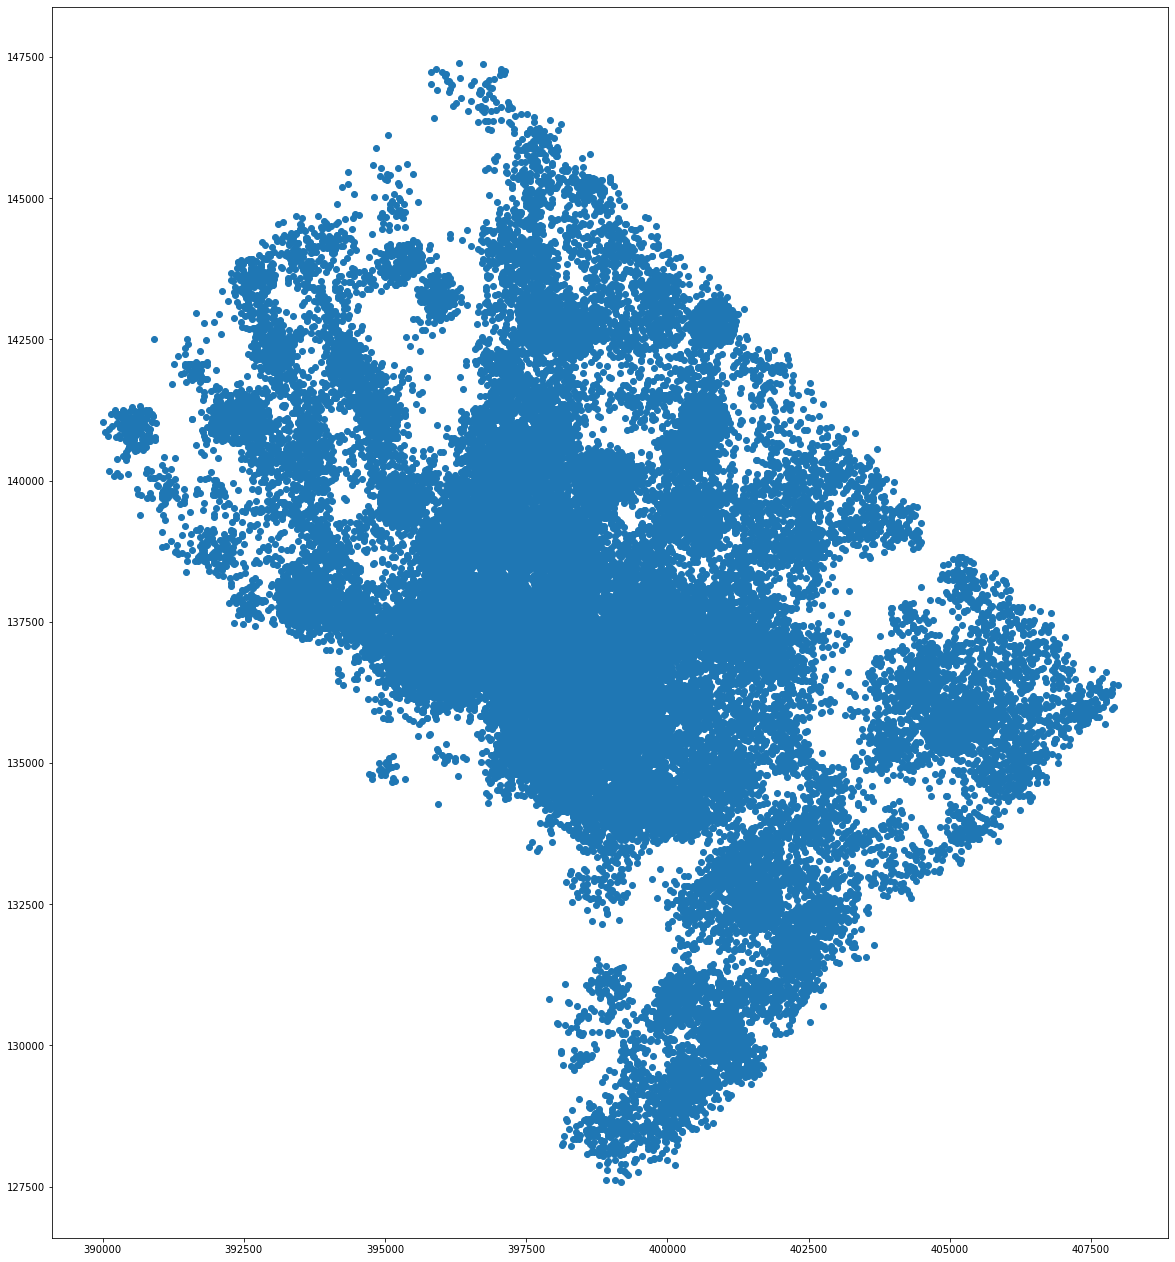

In [13]:
AEDAfterOptimization.plot(figsize=(20, 30))